## Granular Analysis of 2016 Presidential Campaign Ads
Each advertisement airing contains the archive ID, which identifies which specific advertisement was aired. Here I will be looking at each unique ad and determine:
* which ads were featured most by each candidate
* what made these ads more frequently aired in comparison to other ads
* how unique ads were aired in different markets
* how airings of unique ads changed throughout the campaign

I will also cherry-pick some ads and actually watch them on youtube to ensure that they are being classfied appropriately.

In [25]:
## Import and load data
%matplotlib inline
import pickle
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [2]:
## for plots I'll be using the FiveThirtyEight stylesheet
plt.style.use('fivethirtyeight')

In [3]:
## loading data from tv ad .csv
df = pd.read_pickle('data/pres_sorted_with_sponsors_and_party.pickle')

## Adding column for date
df['date_aired'] = df['start_time'].map(lambda x: x.date())

In [4]:
## ad counts by archive ID#
counts = df.archive_id.value_counts()
df_granular = pd.DataFrame(counts)
print(df_granular.head())
print(df_granular.describe())
print(df_granular.iloc[0])
df_granular_50 = df_granular.iloc[0:50]
print(df_granular_50.describe())

                                        archive_id
PolAd_HillaryClinton_DonaldTrump_o35rq        3902
PolAd_DonaldTrump_9tux6                       3525
PolAd_HillaryClinton_DonaldTrump_o5dtl        3216
PolAd_DonaldTrump_ob6cq                       3062
PolAd_HillaryClinton_DonaldTrump_5yuou        2507
       archive_id
count   245.00000
mean    340.20000
std     665.43722
min       1.00000
25%       3.00000
50%      21.00000
75%     332.00000
max    3902.00000
archive_id    3902
Name: PolAd_HillaryClinton_DonaldTrump_o35rq, dtype: int64
        archive_id
count    50.000000
mean   1403.860000
std     836.372928
min     553.000000
25%     773.500000
50%    1097.500000
75%    1834.500000
max    3902.000000


In [5]:
df.dtypes

id                        int64
wp_identifier             int64
network                  object
location                 object
program                  object
program_type             object
start_time       datetime64[ns]
end_time         datetime64[ns]
archive_id               object
embed_url                object
sponsors                 object
sponsor_types            object
race                     object
cycle                   float64
subjects                 object
candidates               object
type                     object
message                  object
date_created     datetime64[ns]
ad_length               float64
day_of_week              object
metro_area               object
state                    object
subject_count           float64
hour_aired                int64
sponsor_class            object
party                    object
date_aired               object
dtype: object

In [6]:
## ad counts for HRC
dem_counts = df[df.party == 'D'].archive_id.value_counts()
## ad counts for Trump
rep_counts = df[df.party == 'R'].archive_id.value_counts()

In [68]:
print(dem_counts.head(15))

PolAd_DonaldTrump_9tux6                   3525
PolAd_DonaldTrump_ob6cq                   3062
PolAd_HillaryClinton_u64in                2494
PolAd_DonaldTrump_5rk9i                   2463
PolAd_DonaldTrump_1hw0n                   2389
PolAd_DonaldTrump_HillaryClinton_1r60p    2309
PolAd_DonaldTrump_51inm                   2301
PolAd_DonaldTrump_byo3d                   2076
PolAd_HillaryClinton_f1h3j                1916
PolAd_DonaldTrump_p3snl                   1883
PolAd_HillaryClinton_DonaldTrump_95xch    1689
PolAd_HillaryClinton_40oek                1599
PolAd_DonaldTrump_ft0io                   1573
PolAd_DonaldTrump_HillaryClinton_1h61c    1393
PolAd_DonaldTrump_s8i5e                   1390
Name: archive_id, dtype: int64


In [12]:
## top 10 HRC ads
for ad in dem_counts.index:
    print (df_unique[df_unique.archive_id == ad].message)

1194    con
Name: message, dtype: object
1020    con
Name: message, dtype: object
651    pro
Name: message, dtype: object
1375    con
Name: message, dtype: object
445    con
Name: message, dtype: object
431    mixed
Name: message, dtype: object
622    con
Name: message, dtype: object
942    con
Name: message, dtype: object
805    pro
Name: message, dtype: object
133    con
Name: message, dtype: object
791    mixed
Name: message, dtype: object
1195    pro
Name: message, dtype: object
943    con
Name: message, dtype: object
433    mixed
Name: message, dtype: object
966    con
Name: message, dtype: object
767    con
Name: message, dtype: object
171    con
Name: message, dtype: object
778    con
Name: message, dtype: object
588    con
Name: message, dtype: object
465    pro
Name: message, dtype: object
1119    con
Name: message, dtype: object
216    mixed
Name: message, dtype: object
1192    con
Name: message, dtype: object
220    mixed
Name: message, dtype: object
1023    con
Name: messag

2016-11-04    510
2016-11-07    435
2016-11-03    411
2016-11-08    304
2016-11-02    280
2016-11-06    272
2016-11-05    231
2016-11-01    179
2016-10-31     72
2016-09-06     61
Name: date_aired, dtype: int64
2016-11-04    523
2016-11-07    385
2016-11-03    379
2016-11-02    301
2016-11-08    289
2016-11-06    210
2016-11-05    204
2016-11-01     67
2016-09-06     60
2016-09-09     55
Name: date_aired, dtype: int64
2016-10-12    329
2016-10-11    265
2016-10-05    220
2016-10-06    205
2016-10-04    196
2016-10-10    174
2016-10-07    155
2016-10-03    149
2016-09-30    115
2016-10-13     98
Name: date_aired, dtype: int64


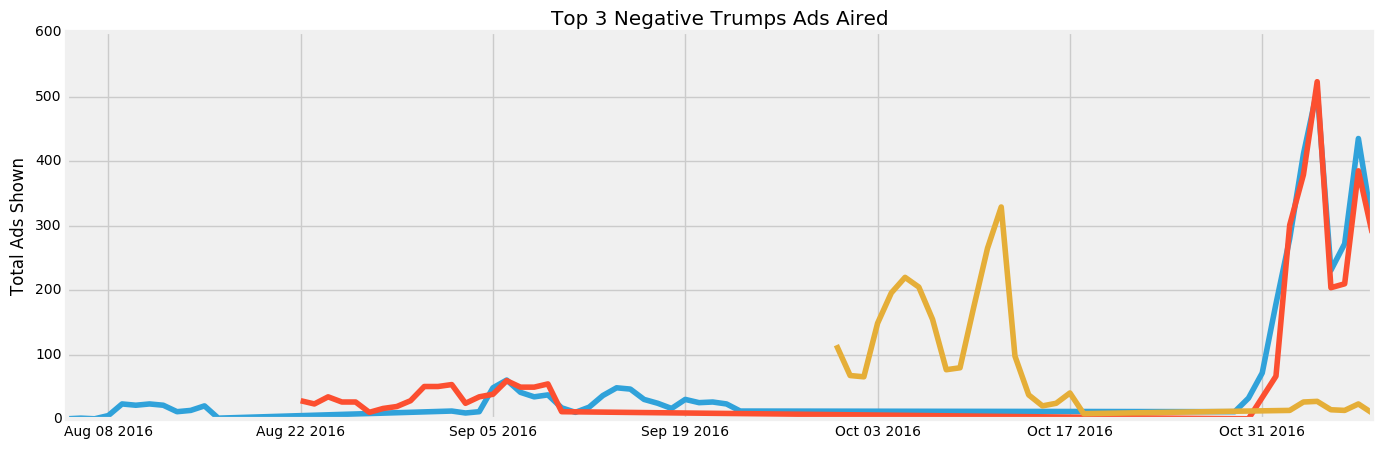

In [40]:
## Negative HRC ads run as a functin of time
dem_con_1 = df[df['archive_id'] == 'PolAd_DonaldTrump_9tux6']['date_aired'].value_counts()
dem_con_2 = df[df['archive_id'] == 'PolAd_DonaldTrump_ob6cq']['date_aired'].value_counts()
dem_con_3 = df[df['archive_id'] == 'PolAd_DonaldTrump_5rk9i']['date_aired'].value_counts()
dem_con_agg = df[(df['party'] == 'D') & (df['message'] == 'con')]['date_aired'].value_counts()
print(dem_con_1.head(10))
print(dem_con_2.head(10))
print(dem_con_3.head(10))
fig, ax = plt.subplots(figsize=(15, 5))
dStart = df['date_aired'].min()
dEnd = df['date_aired'].max()
xticks = pd.date_range(start=dStart, end=dEnd, freq='2W')
dem_con_1.fillna(0).plot()
dem_con_2.fillna(0).plot()
dem_con_3.fillna(0).plot()
plt.title("Top 3 Negative Trumps Ads Aired")
plt.ylabel("Total Ads Shown")
#ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                #interval=1))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
plt.savefig('granular_pics/dem_con_top3.png')

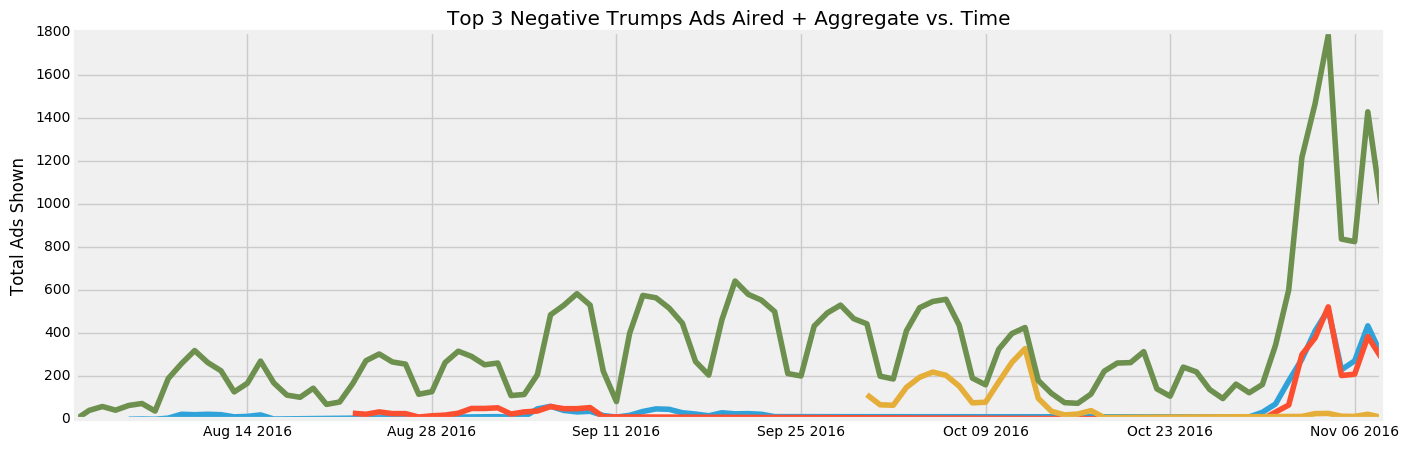

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
dem_con_1.fillna(0).plot()
dem_con_2.fillna(0).plot()
dem_con_3.fillna(0).plot()
dem_con_agg.fillna(0).plot()
plt.title("Top 3 Negative Trumps Ads Aired + Aggregate vs. Time")
plt.ylabel("Total Ads Shown")
#ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                #interval=1))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
plt.savefig('granular_pics/dem_con_top3plusagg.png')

In [44]:
## Let's figure out how to set vacant values to zero and re-run this plot...
## Also - add legend to identify what I want (they default to date_aired for all three)

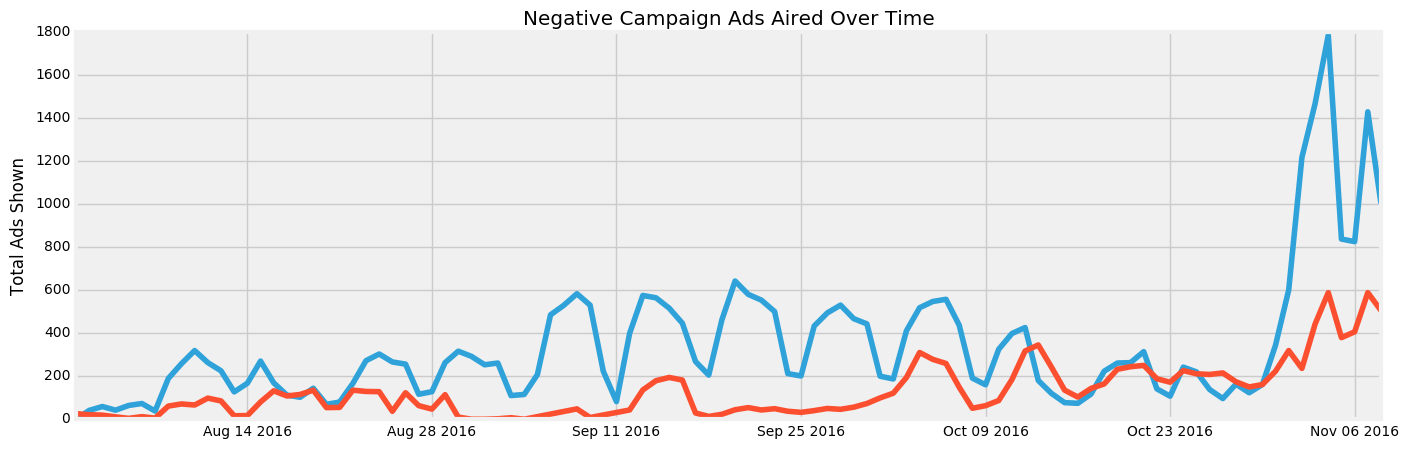

In [42]:
rep_con_agg = df[(df['party'] == 'R') & (df['message'] == 'con')]['date_aired'].value_counts()
fig, ax = plt.subplots(figsize=(15, 5))
dem_con_agg.plot()
rep_con_agg.plot()
plt.title("Negative Campaign Ads Aired Over Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/con_agg.png')

### Negative Campaign Ads vs. Time
As you would expect, volume flucuates over time, with a huge surge the last week of the campaign leading up to election date. It's also quite evident that there is a pattern of one to two data points for every week or so that have less ads aired. We will need to look closer at the data to determine if these indeed are days of the week, and if so, what days are they? 

Next, we will capture the ad value counts for dates beginning with September 8 for a two week period through September 22.

In [67]:
#print(dem_con_agg.head())
date_snip = pd.date_range('2016-09-08', '2016-09-22')
date_snip_s = dem_con_agg[date_snip]
date_snip_df = pd.DataFrame(date_snip_s)
date_snip_df['dow'] = date_snip_s.index.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
date_snip_df['day_dow'] = date_snip_df['dow'].map(lambda x: days[x])
print(date_snip_df)
#print(date_snip_s.index.dayofweek)
print(type(date_snip_df))

            date_aired  dow    day_dow
2016-09-08         584    3   Thursday
2016-09-09         531    4     Friday
2016-09-10         224    5   Saturday
2016-09-11          83    6     Sunday
2016-09-12         400    0     Monday
2016-09-13         576    1    Tuesday
2016-09-14         565    2  Wednesday
2016-09-15         517    3   Thursday
2016-09-16         447    4     Friday
2016-09-17         269    5   Saturday
2016-09-18         206    6     Sunday
2016-09-19         463    0     Monday
2016-09-20         643    1    Tuesday
2016-09-21         581    2  Wednesday
2016-09-22         554    3   Thursday
<class 'pandas.core.frame.DataFrame'>


We can see that the valleys we noticed from the previous plot indeed correspond to two days durin the week - these are the weekend days. Not sure if this is entirely intuitive as I would expect more TV watching happens on the weekend, but this seemed to be the prevailing strategy for HRC's ad frequency.

Let's take a look at the Positive HRC ads and see if they follow the same trends.

2016-11-04    510
2016-11-07    435
2016-11-03    411
2016-11-08    304
2016-11-02    280
2016-11-06    272
2016-11-05    231
2016-11-01    179
2016-10-31     72
2016-09-06     61
Name: date_aired, dtype: int64
2016-11-04    523
2016-11-07    385
2016-11-03    379
2016-11-02    301
2016-11-08    289
2016-11-06    210
2016-11-05    204
2016-11-01     67
2016-09-06     60
2016-09-09     55
Name: date_aired, dtype: int64
2016-10-12    329
2016-10-11    265
2016-10-05    220
2016-10-06    205
2016-10-04    196
2016-10-10    174
2016-10-07    155
2016-10-03    149
2016-09-30    115
2016-10-13     98
Name: date_aired, dtype: int64


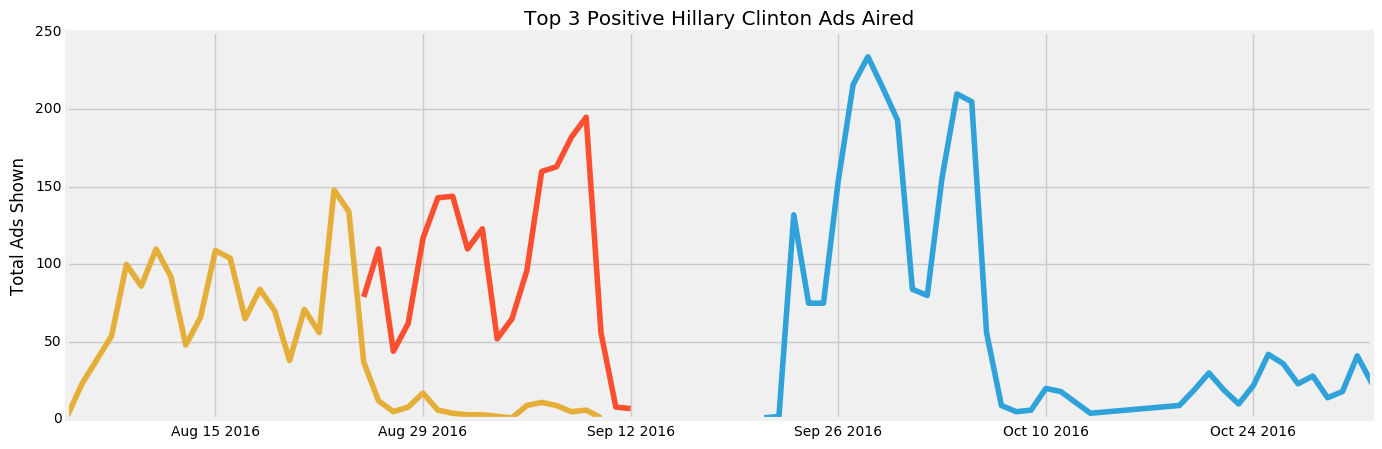

In [69]:
## Definiing data series for the top 3 'pro' HRC ads, as well as the aggregate

dem_pro_1 = df[df['archive_id'] == 'PolAd_HillaryClinton_u64in']['date_aired'].value_counts()
dem_pro_2 = df[df['archive_id'] == 'PolAd_HillaryClinton_f1h3j']['date_aired'].value_counts()
dem_pro_3 = df[df['archive_id'] == 'PolAd_HillaryClinton_40oek']['date_aired'].value_counts()
dem_pro_agg = df[(df['party'] == 'D') & (df['message'] == 'pro')]['date_aired'].value_counts()

## first 10 values for each
print(dem_con_1.head(10))
print(dem_con_2.head(10))
print(dem_con_3.head(10))

## initializing plot
fig, ax = plt.subplots(figsize=(15, 5))

dem_pro_1.fillna(0).plot()
dem_pro_2.fillna(0).plot()
dem_pro_3.fillna(0).plot()
plt.title("Top 3 Positive Hillary Clinton Ads Aired")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/dem_pro_top3.png')

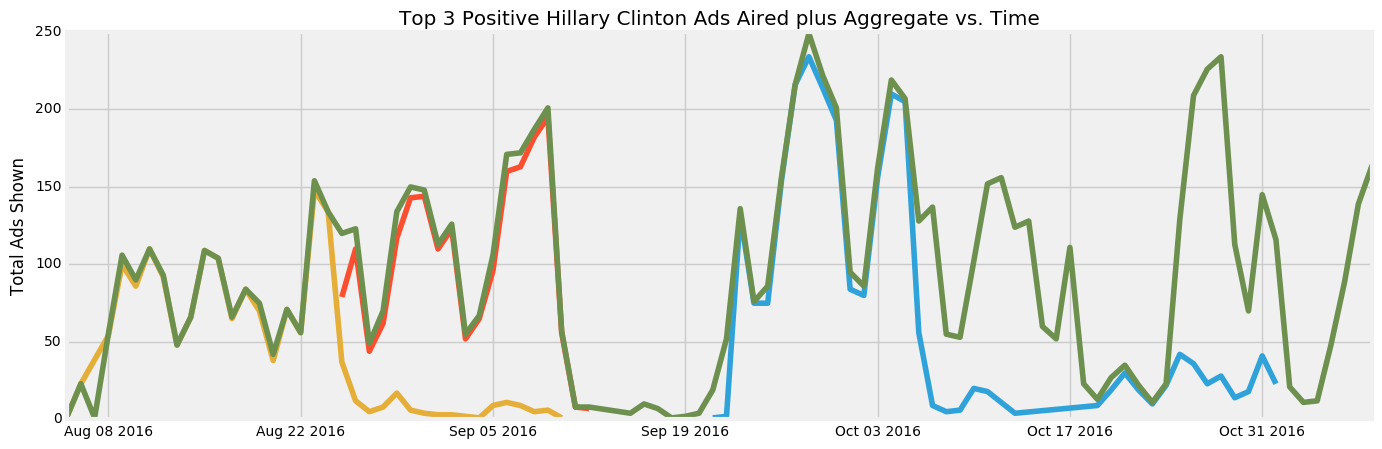

In [70]:
## same plot but with aggregate overlay this time
## initializing plot
fig, ax = plt.subplots(figsize=(15, 5))

dem_pro_1.fillna(0).plot()
dem_pro_2.fillna(0).plot()
dem_pro_3.fillna(0).plot()
dem_pro_agg.fillna(0).plot()
plt.title("Top 3 Positive Hillary Clinton Ads Aired plus Aggregate vs. Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/dem_pro_top3plusagg.png')

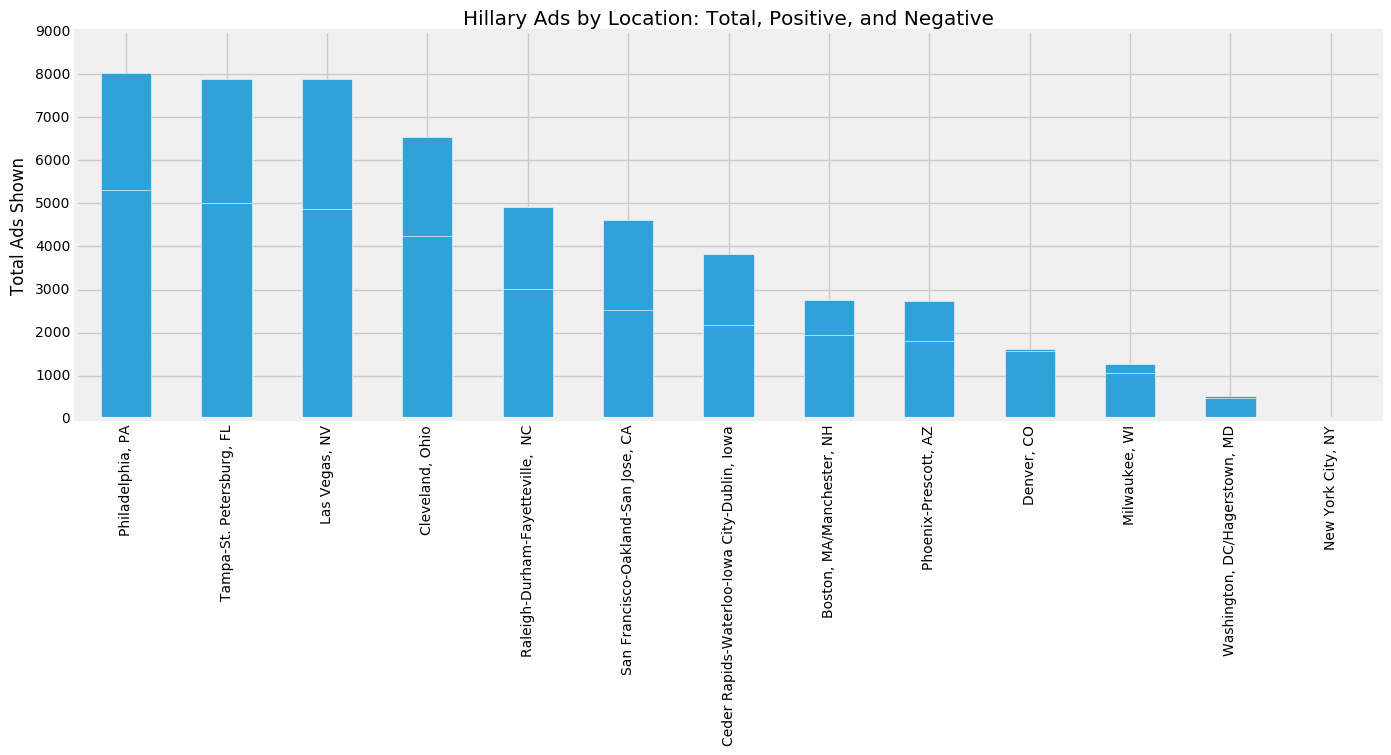

In [72]:
## bar graph of HRC ads vs. location
dem_pro_loc = df[(df['party'] == 'D') & (df['message'] == 'pro')]['location'].value_counts()
dem_con_loc = df[(df['party'] == 'D') & (df['message'] == 'con')]['location'].value_counts()
dem_tot_loc = df[df['party'] == 'D']['location'].value_counts()

fig, ax = plt.subplots(figsize=(15, 5))
dem_tot_loc.plot(kind="bar")
dem_pro_loc.plot(kind="bar")
dem_con_loc.plot(kind="bar")
plt.title("Hillary Ads by Location: Total, Positive, and Negative")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/dem_pro_loc_bar.png')

### And the Republican Analysis...

In [76]:
print(rep_counts.head(15))

PolAd_HillaryClinton_DonaldTrump_o35rq    3902
PolAd_HillaryClinton_DonaldTrump_o5dtl    3216
PolAd_HillaryClinton_DonaldTrump_5yuou    2507
PolAd_HillaryClinton_8t6ga                1262
PolAd_HillaryClinton_7k3xi                1198
PolAd_HillaryClinton_y8v7r                1051
PolAd_HillaryClinton_DonaldTrump_ef7zx    1047
PolAd_DonaldTrump_6pa7l                    887
PolAd_DonaldTrump_3d886                    822
PolAd_HillaryClinton_465l3                 802
PolAd_DonaldTrump_llnn8                    796
PolAd_DonaldTrump_HillaryClinton_su2rx     781
PolAd_HillaryClinton_pv4pc                 771
PolAd_DonaldTrump_c0h66                    672
PolAd_HillaryClinton_pe74t                 645
Name: archive_id, dtype: int64


2016-10-04    222
2016-10-05    203
2016-10-06    177
2016-10-03    160
2016-10-11    110
2016-10-02     81
2016-10-07     80
2016-10-10     56
2016-10-01     52
2016-10-09     51
Name: date_aired, dtype: int64
2016-11-01    142
2016-10-30    130
2016-10-31    104
2016-10-21     87
2016-10-28     83
2016-10-25     82
2016-10-20     82
2016-10-27     79
2016-10-24     71
2016-10-22     66
Name: date_aired, dtype: int64
2016-11-03    147
2016-10-17    139
2016-10-18    136
2016-10-14    122
2016-10-15    101
2016-10-16     86
2016-11-04     77
2016-11-05     65
2016-11-06     45
2016-10-19     36
Name: date_aired, dtype: int64


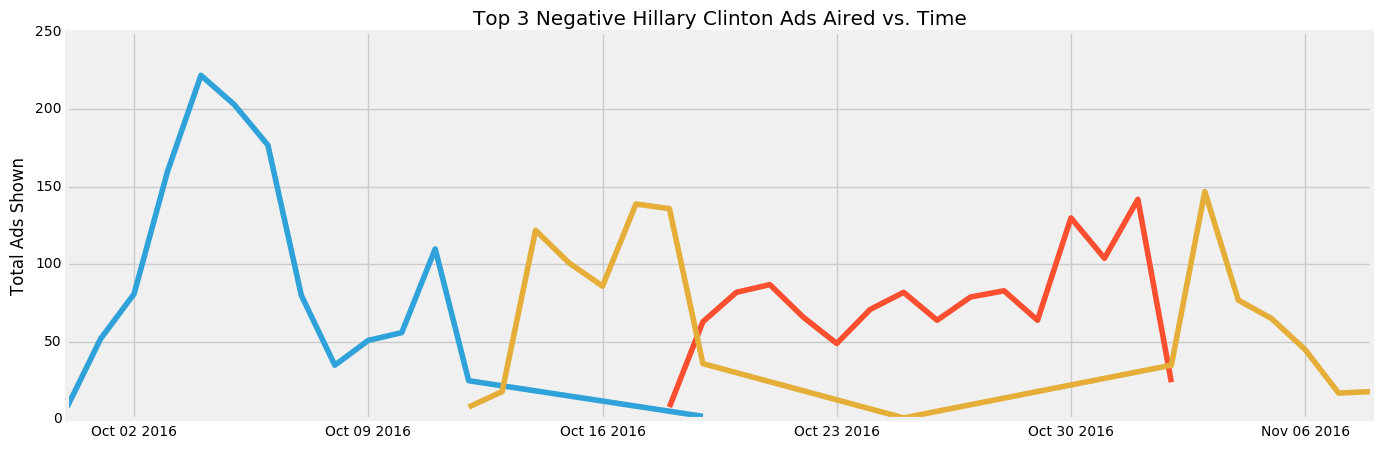

In [78]:
## Negative Hillary ads run as a function of time
rep_con_1 = df[df['archive_id'] == 'PolAd_HillaryClinton_8t6ga']['date_aired'].value_counts()
rep_con_2 = df[df['archive_id'] == 'PolAd_HillaryClinton_7k3xi']['date_aired'].value_counts()
rep_con_3 = df[df['archive_id'] == 'PolAd_HillaryClinton_y8v7r']['date_aired'].value_counts()
rep_con_agg = df[(df['party'] == 'R') & (df['message'] == 'con')]['date_aired'].value_counts()
print(rep_con_1.head(10))
print(rep_con_2.head(10))
print(rep_con_3.head(10))
fig, ax = plt.subplots(figsize=(15, 5))

rep_con_1.fillna(0).plot()
rep_con_2.fillna(0).plot()
rep_con_3.fillna(0).plot()
plt.title("Top 3 Negative Hillary Clinton Ads Aired vs. Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_con_top3.png')

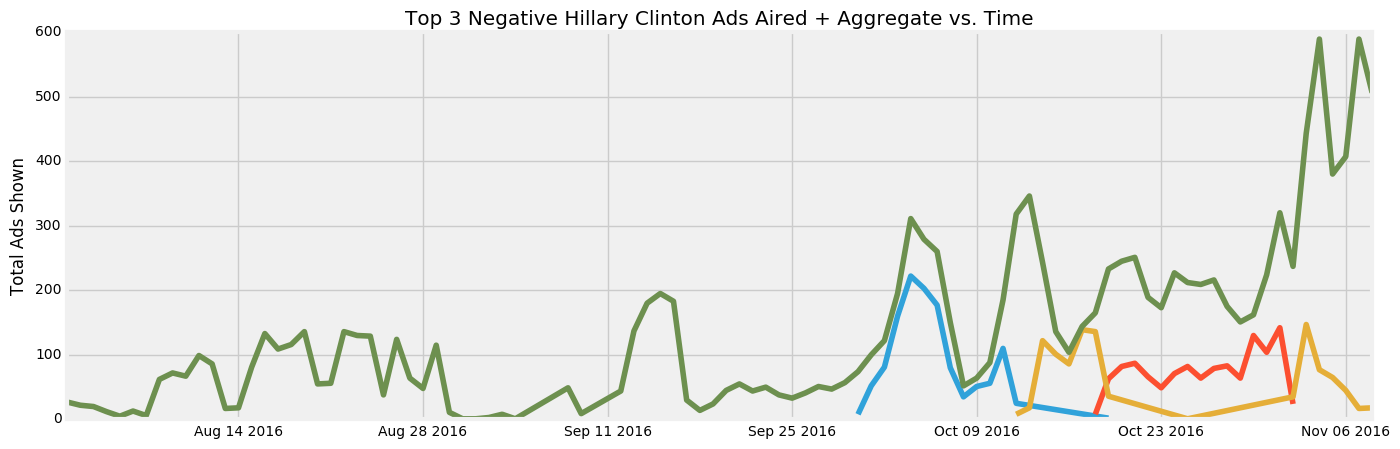

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
rep_con_1.fillna(0).plot()
rep_con_2.fillna(0).plot()
rep_con_3.fillna(0).plot()
rep_con_agg.fillna(0).plot()
plt.title("Top 3 Negative Hillary Clinton Ads Aired + Aggregate vs. Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_con_top3plusagg.png')

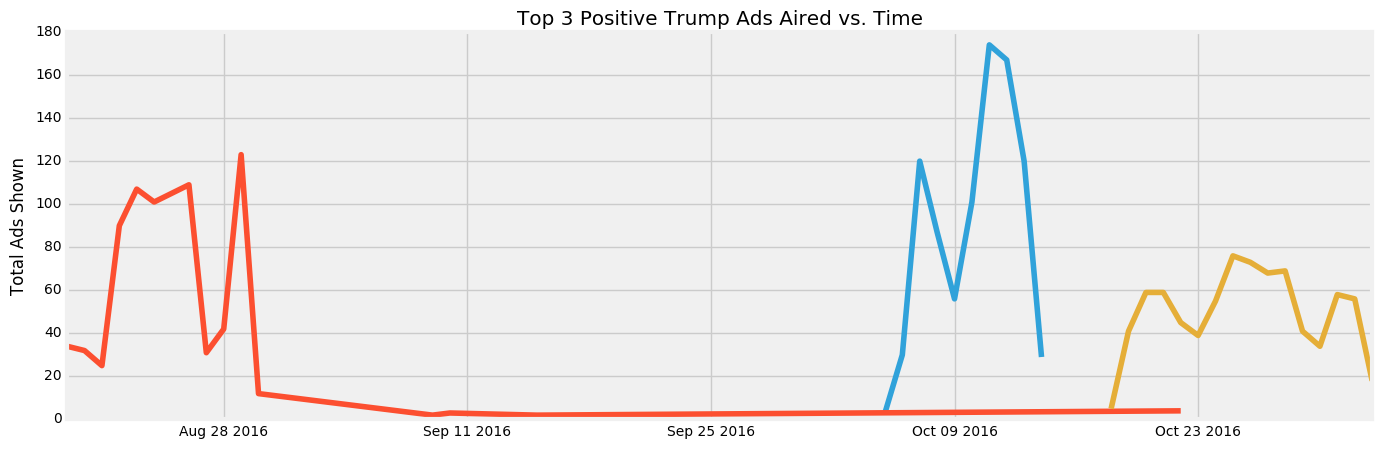

In [80]:
## Definiing data series for the top 3 'pro' Trump ads, as well as the aggregate

rep_pro_1 = df[df['archive_id'] == 'PolAd_DonaldTrump_6pa7l']['date_aired'].value_counts()
rep_pro_2 = df[df['archive_id'] == 'PolAd_DonaldTrump_3d886']['date_aired'].value_counts()
rep_pro_3 = df[df['archive_id'] == 'PolAd_DonaldTrump_llnn8']['date_aired'].value_counts()
rep_pro_agg = df[(df['party'] == 'R') & (df['message'] == 'pro')]['date_aired'].value_counts()

## initializing plot
fig, ax = plt.subplots(figsize=(15, 5))

rep_pro_1.fillna(0).plot()
rep_pro_2.fillna(0).plot()
rep_pro_3.fillna(0).plot()
plt.title("Top 3 Positive Trump Ads Aired vs. Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_pro_top3.png')

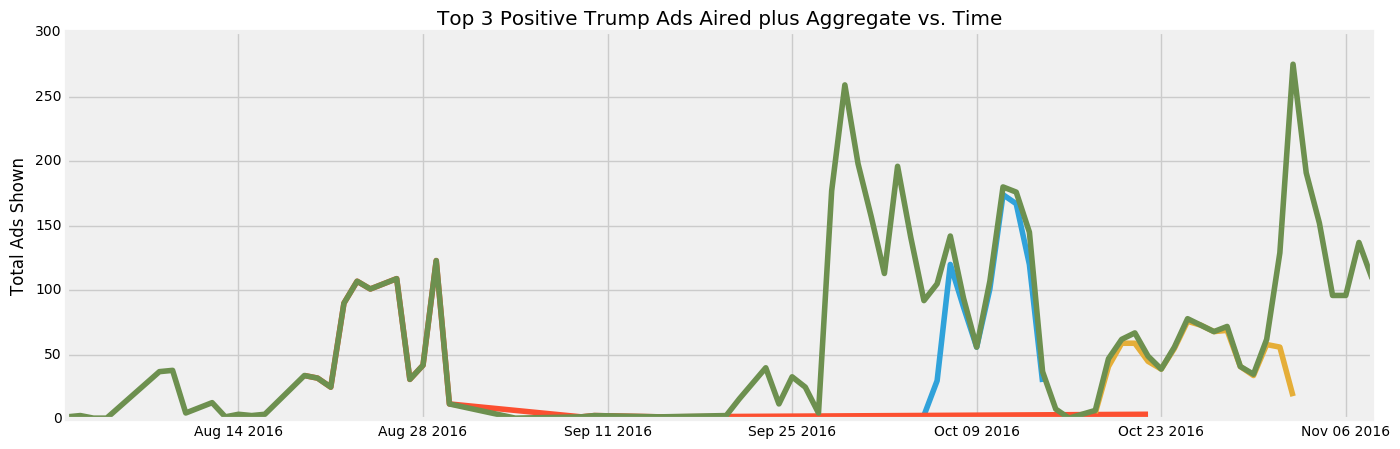

In [81]:
## same plot but with aggregate overlay this time
## initializing plot
fig, ax = plt.subplots(figsize=(15, 5))

rep_pro_1.fillna(0).plot()
rep_pro_2.fillna(0).plot()
rep_pro_3.fillna(0).plot()
rep_pro_agg.fillna(0).plot()
plt.title("Top 3 Positive Trump Ads Aired plus Aggregate vs. Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_pro_top3plusagg.png')

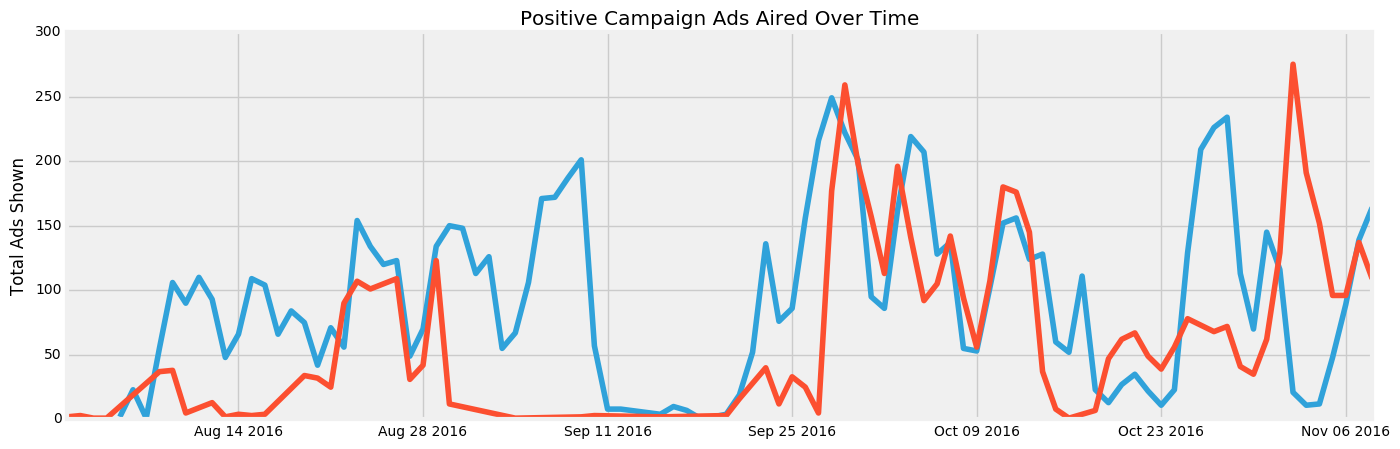

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))
dem_pro_agg.plot()
rep_pro_agg.plot()
plt.title("Positive Campaign Ads Aired Over Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/pro_agg.png')

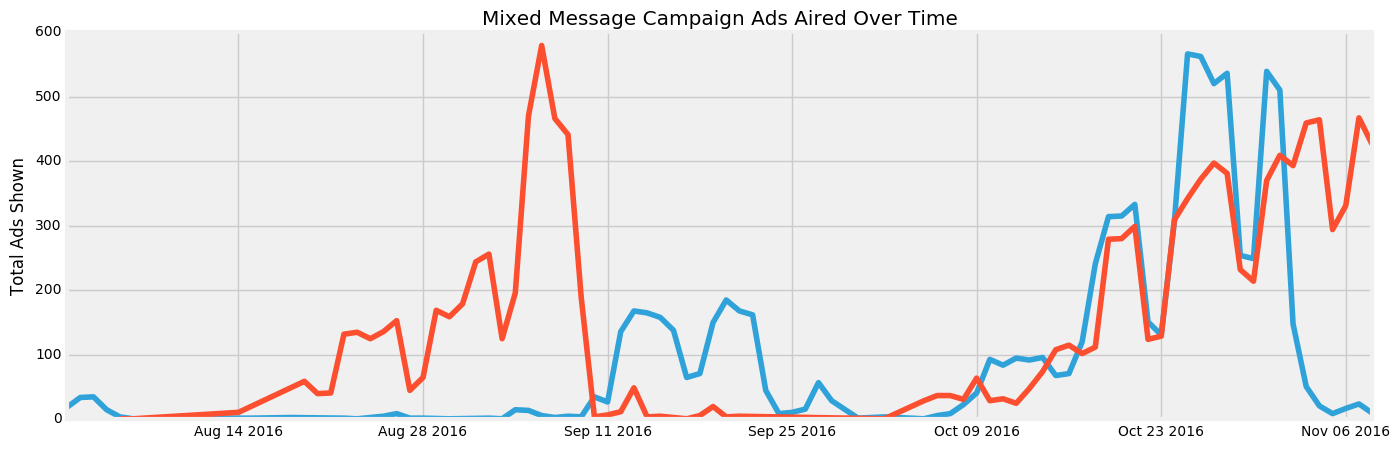

In [83]:
dem_mixed_agg = df[(df['party'] == 'D') & (df['message'] == 'mixed')]['date_aired'].value_counts()
rep_mixed_agg = df[(df['party'] == 'R') & (df['message'] == 'mixed')]['date_aired'].value_counts()
fig, ax = plt.subplots(figsize=(15, 5))
dem_mixed_agg.plot()
rep_mixed_agg.plot()
plt.title("Mixed Message Campaign Ads Aired Over Time")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/mixed_agg.png')

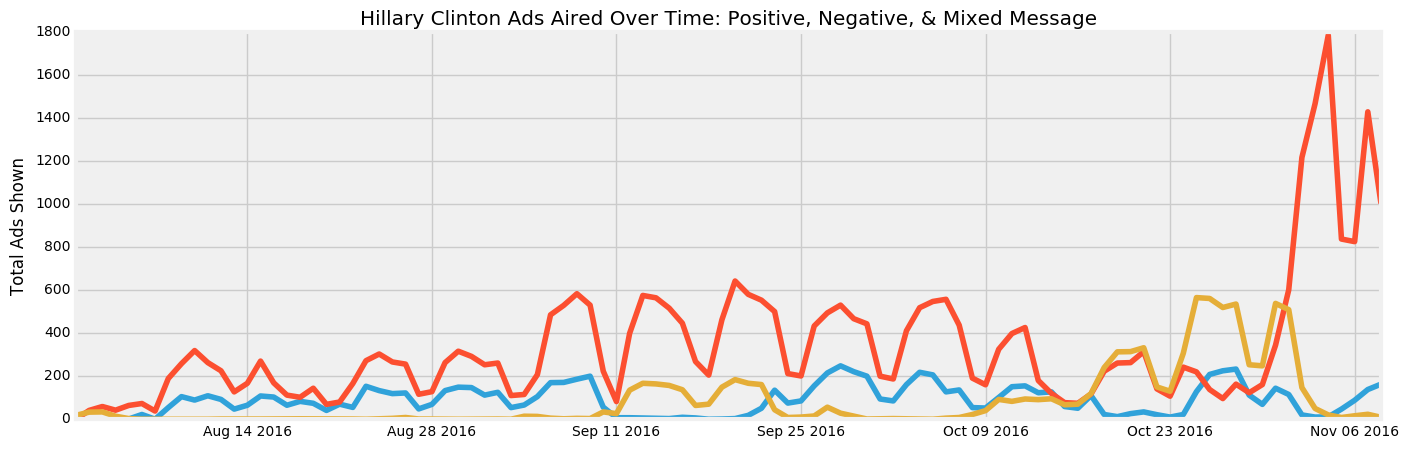

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))
dem_pro_agg.plot()
dem_con_agg.plot()
dem_mixed_agg.plot()
plt.title("Hillary Clinton Ads Aired Over Time: Positive, Negative, & Mixed Message")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/dem_agg.png')

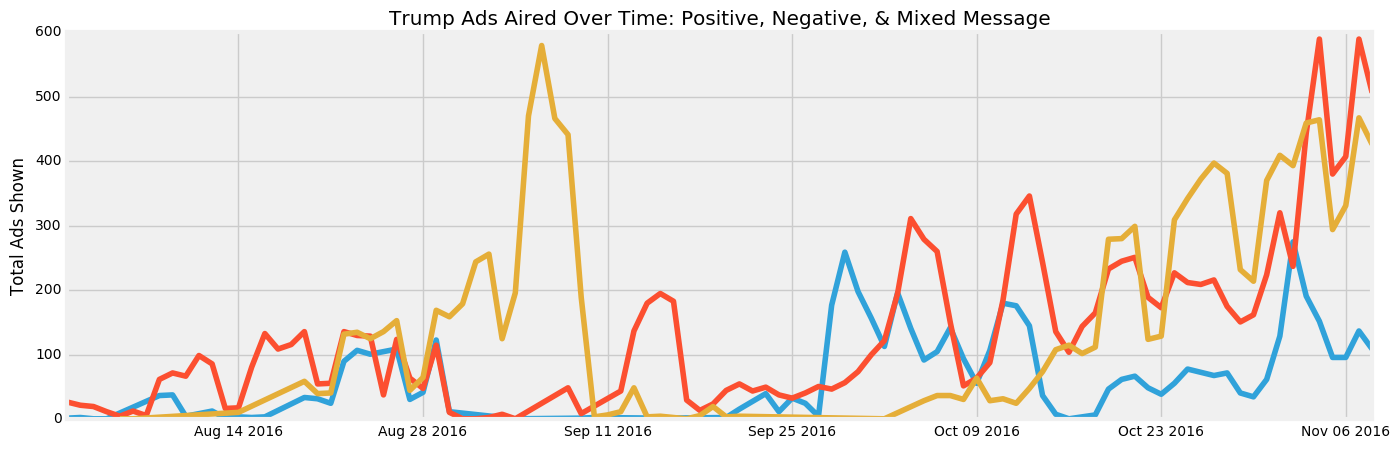

In [85]:
fig, ax = plt.subplots(figsize=(15, 5))
rep_pro_agg.plot()
rep_con_agg.plot()
rep_mixed_agg.plot()
plt.title("Trump Ads Aired Over Time: Positive, Negative, & Mixed Message")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_agg.png')

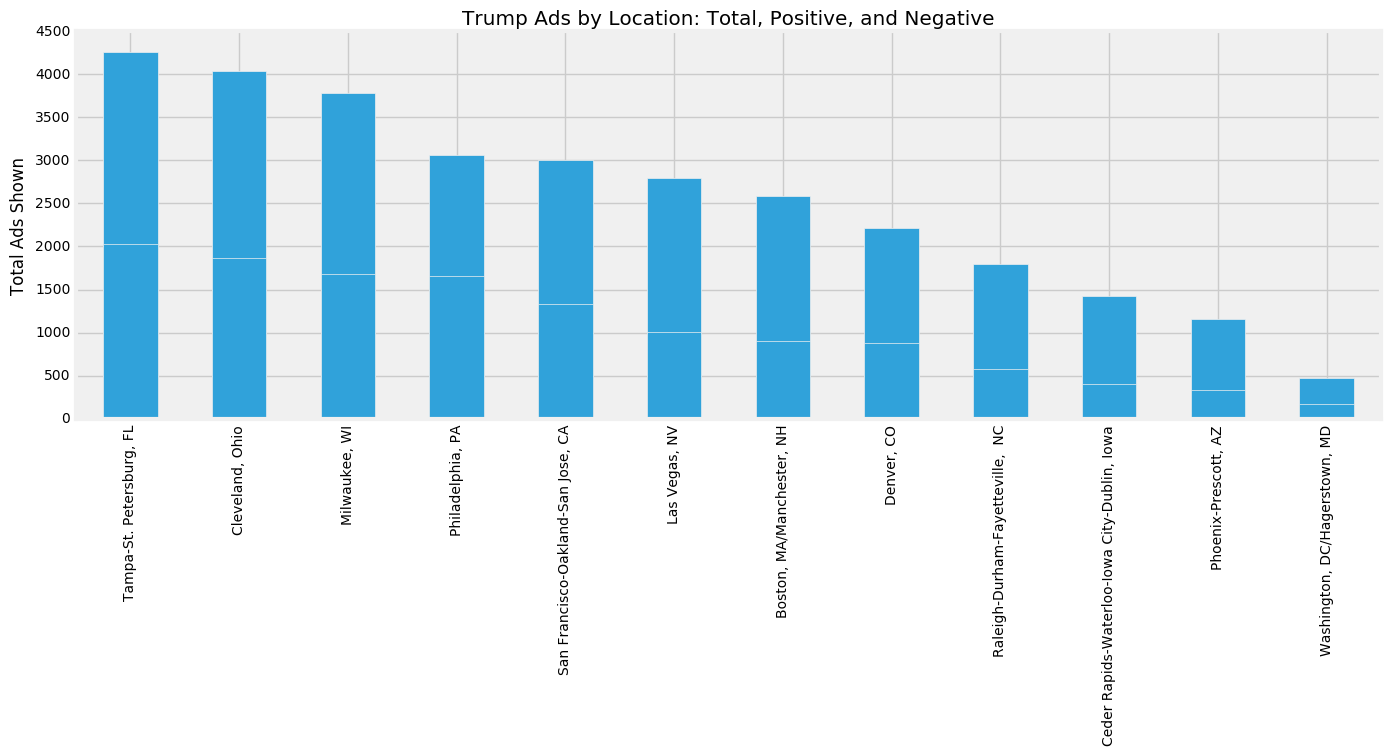

In [86]:
## bar graph of Trump ads vs. location
rep_pro_loc = df[(df['party'] == 'R') & (df['message'] == 'pro')]['location'].value_counts()
rep_con_loc = df[(df['party'] == 'R') & (df['message'] == 'con')]['location'].value_counts()
rep_tot_loc = df[df['party'] == 'R']['location'].value_counts()

fig, ax = plt.subplots(figsize=(15, 5))
rep_tot_loc.plot(kind="bar")
rep_pro_loc.plot(kind="bar")
rep_con_loc.plot(kind="bar")
plt.title("Trump Ads by Location: Total, Positive, and Negative")
plt.ylabel("Total Ads Shown")
plt.savefig('granular_pics/rep_loc_bar.png')

In [8]:
## load ad specific data
df_unique = pd.read_csv('data/unique_ads_aired.csv')
## we only want the top 50 frequently aired ads to be included in our unique ads
list_archive_ids = df_granular_50.index

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
print(df_unique.head())
print(df_unique.describe())

In [ ]:
## for our granular dataframe we want to add message, sponsors, reference_count
def add_gran_col(col_title):
    for value in df_granular_50.index:
        df_granular_50[col_title][value] = df_unique[df_unique['archive_id' == value]][col_title]

In [ ]:
## add message
print(df_granular_50.index)
print(df_granular_50.archive_id['PolAd_HillaryClinton_DonaldTrump_o35rq'])
add_gran_col('message')